In [39]:
#Kaggle의 titanic 데이터를 이용해서 생존 여부를 나타내는 survived값을 예측하기 위한 Logistic회귀 모델 구현
#1단계 데이터 전처리
from sklearn.metrics import roc_curve, recall_score,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#데이터를 로드
df = sns.load_dataset('titanic')
df.head()

#널값 확인
df.isnull().sum()

#deck 변수 결손치열, alive를 제외
drop_list = ['deck','alive']
df = df.drop(drop_list, axis =1)
df 

#결손치가 있는 행을 삭제해서 표시
df= df.dropna()
df

#데이터 분할 survived(대상), 특징이되는 데이터(Feature Selection) : X
X = df.drop("survived", axis=1)
Y =df['survived']
X
#X데이터의 더미화 확인
X=pd.get_dummies(X) #더미화란 : 가상 변수를 만들어 범주안에 0또는 1의 지정
X.head()


,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,False,False,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,3,26.0,0,0,7.9250,False,True,1,0,0,...,1,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,False,1,0,0,...,1,1,0,0,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,True,True,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [40]:
#2단계 분류학습 시작
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.5, random_state=0)

#데이터의 크기를 확인 
print("X.shape",X.shape)
print("X_train.shape",X_train.shape)
print('X_test.shape',X_test.shape)
print("Y.shape",Y.shape)
print("Y_train.shape",Y_train.shape)
print('Y_test.shape',Y_test.shape)


X.shape (712, 21)
X_train.shape (356, 21)
X_test.shape (356, 21)
Y.shape (712,)
Y_train.shape (356,)
Y_test.shape (356,)


#ROC
![](image1.png)

In [43]:
#3단계 로지스틱 회귀 모델의 인스턴스를 만들고 훈련데이터로 학습시키자 (맞다아니다를 판정하는데 많이사용함)
#1000번 반복해서 학습  sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
ir = LogisticRegression(max_iter = 1000, random_state=0)
ir.fit(X_train,Y_train)    #학습

#4단계 학습데이터 판정 결과를(예측치) test데이터로 확인
y_pred = ir.predict(X_test)
print(y_pred)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0]


In [45]:
#5단계 지표를 산출하자 : 4단계에서 구현한 예측치 y_pred와 test데이터의 실제 값을 사용해서 평가 지표를 구할 수 있다
from sklearn.metrics import *
print('confusion_matrix =',confusion_matrix(Y_test,y_pred))
print('accuracy =',accuracy_score(Y_test,y_pred))
print('precision= ',precision_score(Y_test,y_pred))
print('recall =',recall_score(Y_test,y_pred))
print('f1 score =',f1_score(Y_test,y_pred))

confusion_matrix = [[179  31]
 [ 40 106]]
accuracy = 0.800561797752809
precision=  0.7737226277372263
recall = 0.726027397260274
f1 score = 0.7491166077738517


In [46]:
# Log loss 기법 : 확률을 입력으로 분류하는 기법의 성능평가
#로지스틱 회귀모델에서 대상을 0과 1로 분류되는 확률을 각각출력하고 싶을 경우 predict_proba()
#먼저 모델에서 Y가 0인 확률을 예측해서 확인 
probs = ir.predict_proba(X_test)
print(probs[:5])

[[0.48061197 0.51938803]
 [0.80028107 0.19971893]
 [0.02380526 0.97619474]
 [0.85349269 0.14650731]
 [0.94115893 0.05884107]]


In [ ]:
ROC 곡선과 PR곡선은 데이터가 Positive일 확률 모델에서 예측해서 Positive일 경우가 높다고 예측하고 순서대로 정렬
예측한 확률에서 Positive일 경우 판정기준(임계값)을 깃점으로 , FPR,TPR이 어떻게 변화하는지를 확인
적합률(Precision)와 재현률 (Recall, TPR)의 변화를 나타낸것이 PR곡선

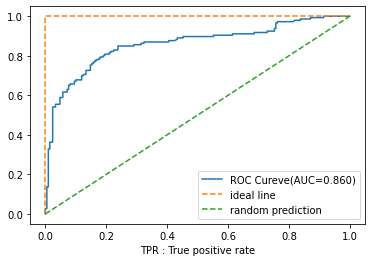

In [51]:
#ROC 곡선, PR 곡선 각각의 AUC 산출
from sklearn.metrics import *
#테스트 데이터가 클래스 1에 속하는 확률을 예측하고 그 확률에서 FPR,TPR 임계값 계산해보자
Y_score = ir.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(Y_test,Y_score)
#값을 데이터 프레임으로 확인 
df = pd.DataFrame([fpr,tpr, thresholds])
df.T

#plot 해보자
plt.plot(fpr, tpr, label = 'ROC Cureve(AUC=%.3f)' %auc(fpr,tpr))
plt.plot([0,0,1],[0,1,1], linestyle = '--' , label = 'ideal line')
plt.plot([0,1],[0,1], linestyle = '--' , label = 'random prediction')
plt.legend()
plt.xlabel("FPR : False positive rate")
plt.xlabel("TPR : True positive rate")
plt.show()

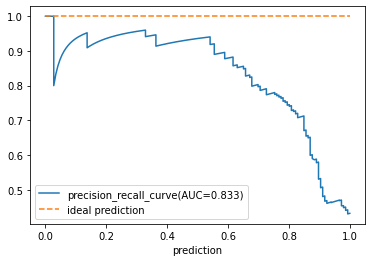

In [57]:
#번외 PR곡선
probas_pred = ir.predict_proba(X_test)[:,1]
precision,recall,thresholds = precision_recall_curve(Y_test, probas_pred)

plt.plot(recall, precision, label = 'precision_recall_curve(AUC=%.3f)' %auc(recall,precision))
plt.plot([0,1],[1,1], linestyle = '--' , label = 'ideal prediction')
plt.legend()
plt.xlabel("recall")
plt.xlabel("prediction")
plt.show()